In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('medicall.csv')
df.shape

(1338, 7)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# finding any null value present in each column
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
# quick statistical overview of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


Correlation with charges (numeric variables only):
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


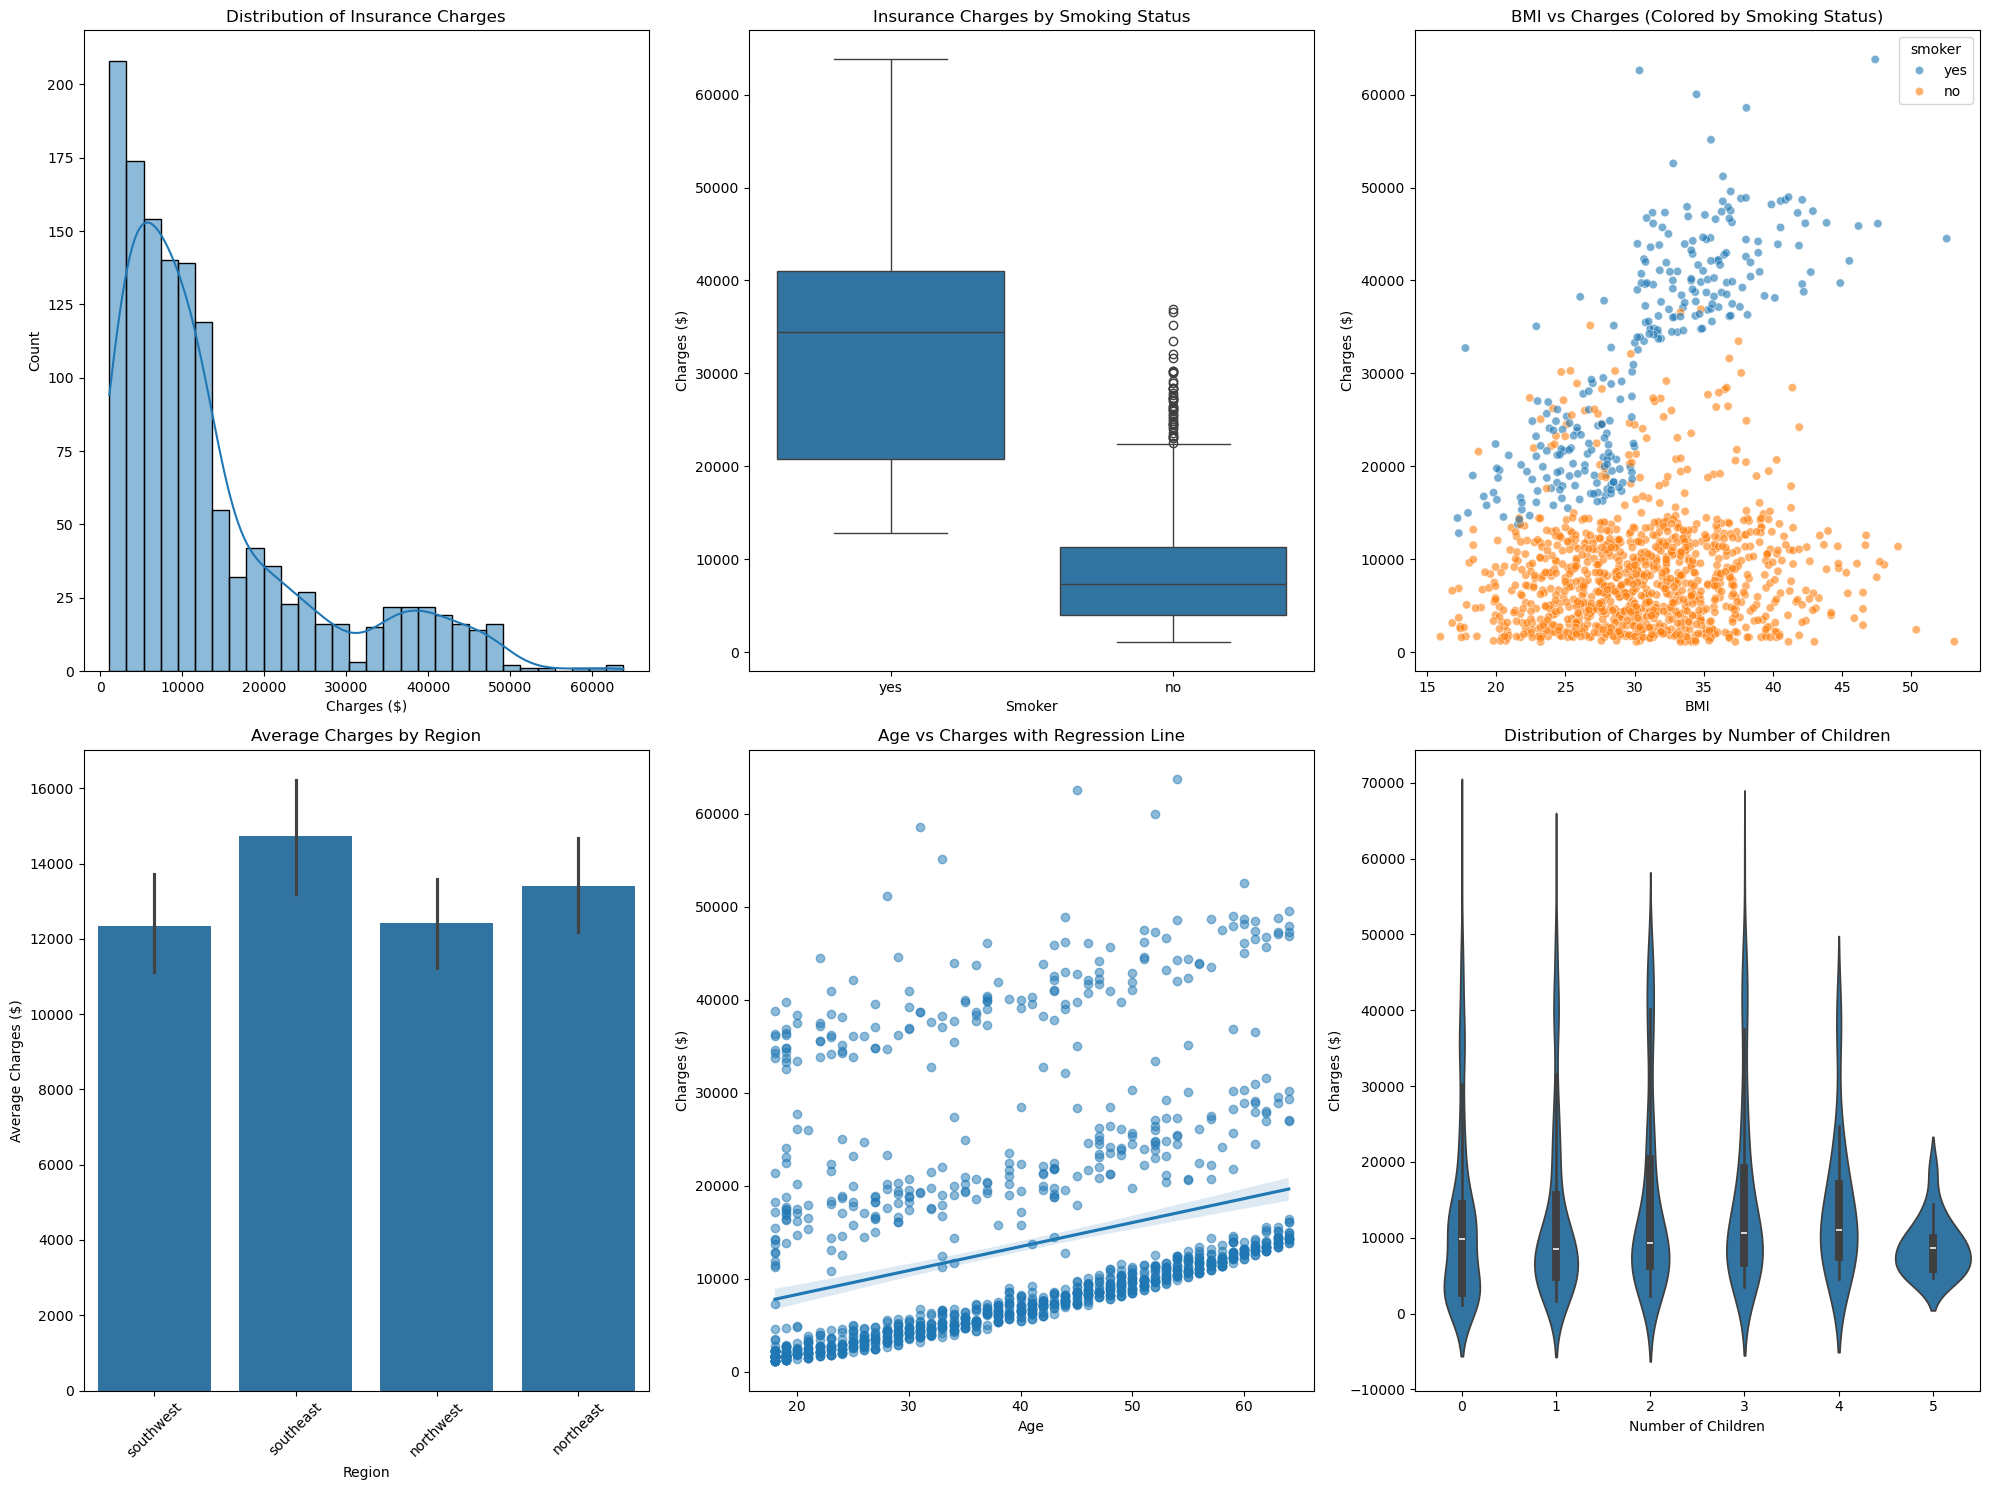

In [35]:

def analyze_medical_data(df):
    # Create dummy variables for categorical columns
    df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Distribution of charges (histogram)
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x='charges', bins=30, kde=True)
    plt.title('Distribution of Insurance Charges')
    plt.xlabel('Charges ($)')
    plt.ylabel('Count')
    
    # 2. Box plot of charges by smoker status
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x='smoker', y='charges')
    plt.title('Insurance Charges by Smoking Status')
    plt.xlabel('Smoker')
    plt.ylabel('Charges ($)')
    
    # 3. Scatter plot of BMI vs Charges, colored by smoker status
    plt.subplot(2, 3, 3)
    sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
    plt.title('BMI vs Charges (Colored by Smoking Status)')
    plt.xlabel('BMI')
    plt.ylabel('Charges ($)')
    
    # 4. Average charges by region (bar plot)
    plt.subplot(2, 3, 4)
    sns.barplot(data=df, x='region', y='charges', estimator='mean')
    plt.title('Average Charges by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Charges ($)')
    plt.xticks(rotation=45)
    
    # 5. Age vs Charges with regression line
    plt.subplot(2, 3, 5)
    sns.regplot(data=df, x='age', y='charges', scatter_kws={'alpha':0.5})
    plt.title('Age vs Charges with Regression Line')
    plt.xlabel('Age')
    plt.ylabel('Charges ($)')
    
    # 6. Charges by number of children (violin plot)
    plt.subplot(2, 3, 6)
    sns.violinplot(data=df, x='children', y='charges')
    plt.title('Distribution of Charges by Number of Children')
    plt.xlabel('Number of Children')
    plt.ylabel('Charges ($)')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Calculate correlation for numeric columns only
    numeric_cols = ['age', 'bmi', 'children', 'charges']
    correlation = df[numeric_cols].corr()['charges'].sort_values(ascending=False)
    
    return correlation

# Run the analysis
correlation = analyze_medical_data(df)
print("\nCorrelation with charges (numeric variables only):")
print(correlation)

plt.show()


Statistical Insights:
Average Insurance Charge: $13,270.42
Median Insurance Charge: $9,382.03
Standard Deviation: $12,110.01

Smoker vs Non-smoker Charges:
no: $8,434.27
yes: $32,050.23

Smokers pay 280.0% more on average

Correlations with Charges:
Age: 0.299
BMI: 0.198

Average Charges by Region:
northeast: $13,406.38
northwest: $12,417.58
southeast: $14,735.41
southwest: $12,346.94


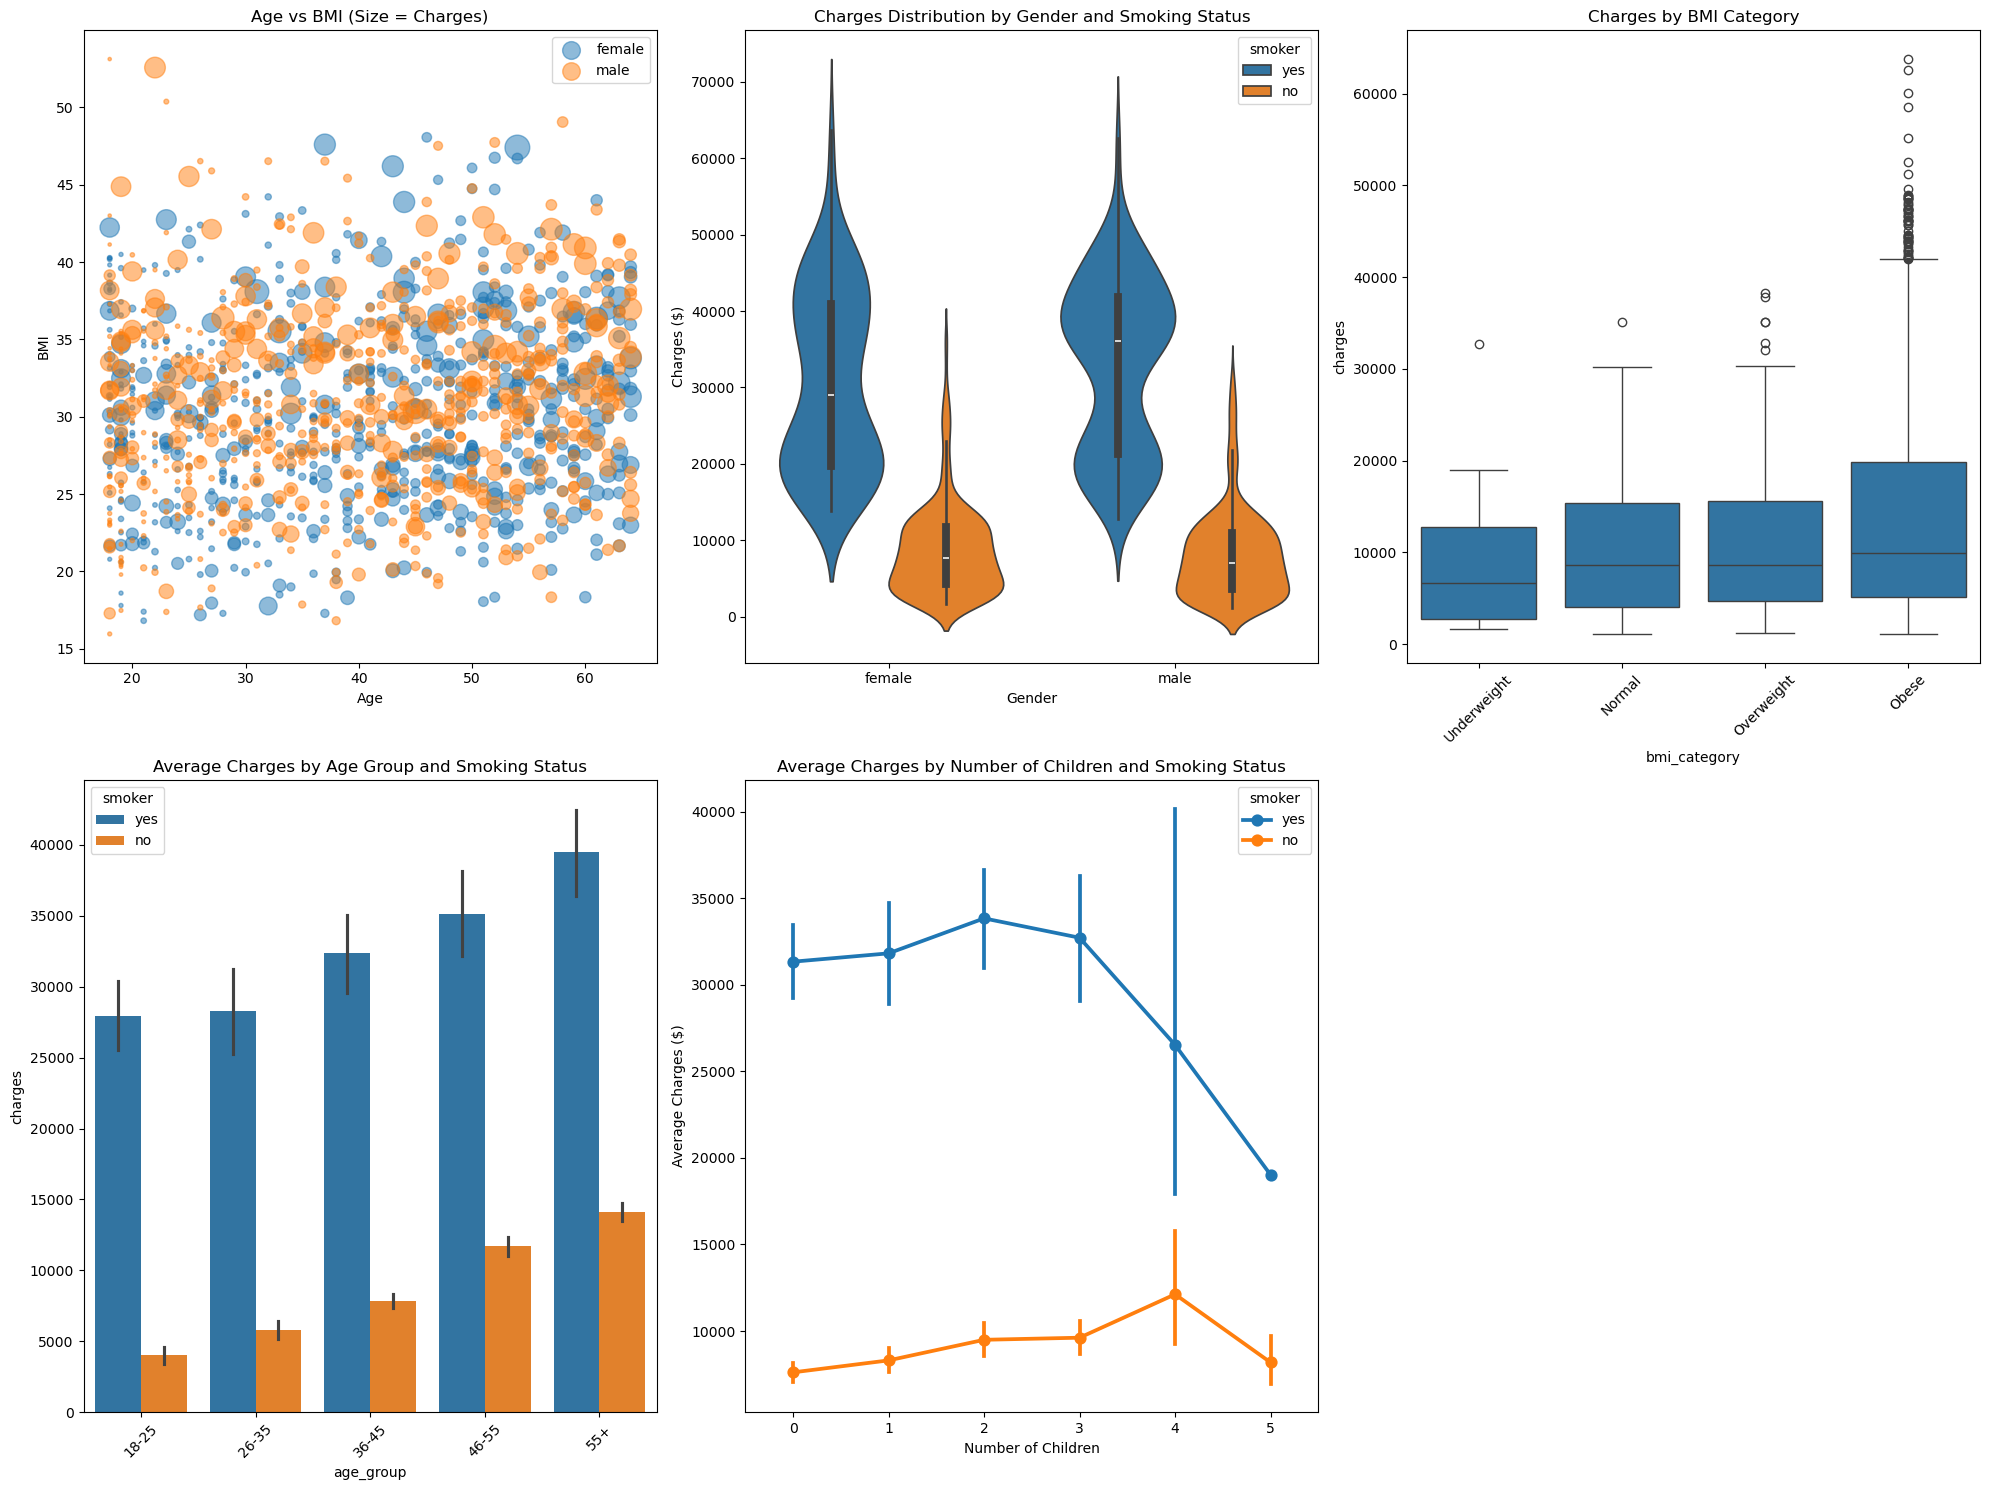

In [40]:


def extended_medical_analysis(df):
    # Create figure for new visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Age distribution by gender with charges represented by size
    plt.subplot(2, 3, 1)
    for gender in df['sex'].unique():
        subset = df[df['sex'] == gender]
        plt.scatter(subset['age'], subset['bmi'], 
                   s=subset['charges']/200, alpha=0.5, 
                   label=gender)
    plt.title('Age vs BMI (Size = Charges)')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend()
    
    # 2. Charges distribution by smoking status and gender
    plt.subplot(2, 3, 2)
    sns.violinplot(data=df, x='sex', y='charges', hue='smoker')
    plt.title('Charges Distribution by Gender and Smoking Status')
    plt.xlabel('Gender')
    plt.ylabel('Charges ($)')
    
    # 3. BMI categories analysis
    plt.subplot(2, 3, 3)
    df['bmi_category'] = pd.cut(df['bmi'], 
                               bins=[0, 18.5, 24.9, 29.9, 100],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    sns.boxplot(data=df, x='bmi_category', y='charges')
    plt.title('Charges by BMI Category')
    plt.xticks(rotation=45)
    
    
    # 4. Age groups analysis
    plt.subplot(2, 3, 4)
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100],
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    sns.barplot(data=df, x='age_group', y='charges', hue='smoker')
    plt.title('Average Charges by Age Group and Smoking Status')
    plt.xticks(rotation=45)
    
    # 5. Children and charges relationship by smoking status
    plt.subplot(2, 3, 5)
    sns.pointplot(data=df, x='children', y='charges', hue='smoker')
    plt.title('Average Charges by Number of Children and Smoking Status')
    plt.xlabel('Number of Children')
    plt.ylabel('Average Charges ($)')
    
    plt.tight_layout()
    
    # Statistical Analysis
    stats_dict = {
        'mean_charge': df['charges'].mean(),
        'median_charge': df['charges'].median(),
        'std_charge': df['charges'].std(),
        'smoker_mean': df.groupby('smoker')['charges'].mean().to_dict(),
        'region_mean': df.groupby('region')['charges'].mean().to_dict(),
        'age_correlation': df['age'].corr(df['charges']),
        'bmi_correlation': df['bmi'].corr(df['charges'])
    }
    
    # Calculate percentage difference in charges between smokers and non-smokers
    smoker_charges = df[df['smoker'] == 'yes']['charges'].mean()
    non_smoker_charges = df[df['smoker'] == 'no']['charges'].mean()
    stats_dict['smoker_difference_percent'] = ((smoker_charges - non_smoker_charges) / non_smoker_charges) * 100
    
    return stats_dict

# Run the analysis
stats_results = extended_medical_analysis(df)

# Print statistical insights
print("\nStatistical Insights:")
print(f"Average Insurance Charge: ${stats_results['mean_charge']:,.2f}")
print(f"Median Insurance Charge: ${stats_results['median_charge']:,.2f}")
print(f"Standard Deviation: ${stats_results['std_charge']:,.2f}")
print(f"\nSmoker vs Non-smoker Charges:")
for status, charge in stats_results['smoker_mean'].items():
    print(f"{status}: ${charge:,.2f}")
print(f"\nSmokers pay {stats_results['smoker_difference_percent']:.1f}% more on average")
print(f"\nCorrelations with Charges:")
print(f"Age: {stats_results['age_correlation']:.3f}")
print(f"BMI: {stats_results['bmi_correlation']:.3f}")
print("\nAverage Charges by Region:")
for region, charge in stats_results['region_mean'].items():
    print(f"{region}: ${charge:,.2f}")

plt.show()